# Sensitivity Analysis: Unfairness == 0.5

# Data Cleaning for SA Data

In [1]:
import mesa
import numpy as np
import random
import networkx as nx 
import bisect
from pathlib import Path
import os
import sys
import csv
import pandas as pd

# Basic paths
src_path = str(Path.cwd().parent / "scripts")
sys.path.append(src_path)

project_path = Path().resolve().parent
csv_path = project_path / "data"

# Python file stored in script folder
from data_cleaning import *

# Data Preprocessing

In [2]:
'''
    Run it only if the data doesn't exist.
    A long run time.
'''

# num_scen = 3
# num_reps = 10
# dfs = []
# for j in range(1, num_scen+1):
#     for i in range(1, num_reps+1):
#         file_name = f"scenario{j}_rep{i}_uf05.csv"
#         df = process_data(csv_path / file_name)
#         df['Scenario'] = j
#         df['Replication'] = i
#         dfs.append(df)

In [3]:
'''
    Save the processed data
'''
# for i in range(1, num_scen*num_reps+1):
#         df = dfs[i-1]
#         scen = df['Scenario'][0]
#         rep = df['Replication'][0]
#         df.to_csv(csv_path/f's{scen}r{rep}_uf05_analysis.csv')

In [4]:
"""
    Load the data
    Run this only if you already have the data sets. 
"""
num_scen = 3
num_reps = 10

dfs = []
for j in range(1, num_scen+1):
    for i in range(1, num_reps+1):
        file_name = f"s{j}r{i}_uf05_analysis.csv"
        df = pd.read_csv(csv_path/file_name, index_col=0)
        df['Scenario'] = j
        df['Replication'] = i
        dfs.append(df)

In [21]:
'''
    Read raw data
'''
num_scen = 3
num_reps = 10

rdfs = []
for j in range(1, num_scen+1):
    for i in range(1, num_reps+1):
        file_name = f"scenario{j}_rep{i}_uf05.csv"
        rdf = pd.read_csv(csv_path/file_name)
        rdf['Scenario'] = j
        rdf['Replication'] = i
        rdfs.append(rdf)

# Plots

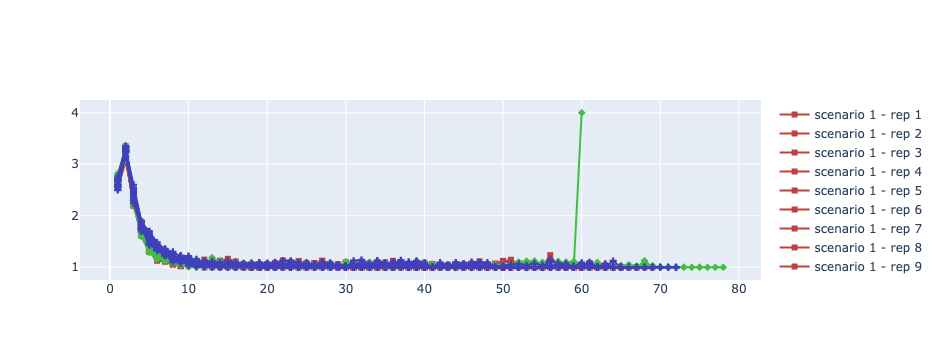

In [6]:
import plotly.graph_objects as go

# Create dictionary of dataframes
df_dict = {}
row=0
for j in range(1, num_scen+1):
    for i in range(1, num_reps+1):
        key = f"scenario {j}"
        df = dfs[row]
        df_mean = df.groupby(['Cohort'], as_index=False).Edu_level.mean()
        if key in df_dict:
            df_dict[key].append(df_mean)
        else:
            df_dict[key] = [df_mean]
        row += 1

# Create list of replications and scenarios
replications = [f"rep {i}" for i in range(1, num_reps+1)]
scenarios = [f"scenario {j}" for j in range(1, num_scen+1)]

# Create figure
fig = go.Figure()

# Loop through each scenario
for i, scenario in enumerate(scenarios):
    # Get dataframes for current scenario
    dfs_scenario = df_dict[scenario]
    # Get color for current scenario
    color = f"hsl({(i/len(scenarios))*360}, 50%, 50%)"
    # Loop through each replication of the current scenario
    for j, df in enumerate(dfs_scenario):
        # Get name for current replication
        name = f"{scenario} - rep {j+1}"
        fig.add_trace(go.Scatter(x=df["Cohort"], y=df["Edu_level"],
                                  name=name,
                                  mode="lines+markers",
                                  line=dict(color=color),
                                  marker=dict(symbol=int(scenario[-1]))))

# Show figure
fig.show()



Increasing the unfairness scale fom 0.2 to 0.5 yields a dramatic difference in average educational levels over cohorts. 

Maybe unfairness ~ cooperation (in ergodicity economics). This shows that when the society is unfair, the entire society will be disadvantaged. (Low human capital in society --> who works for this society?)

--> To support this reasoning, look how more previlleged families behave. 

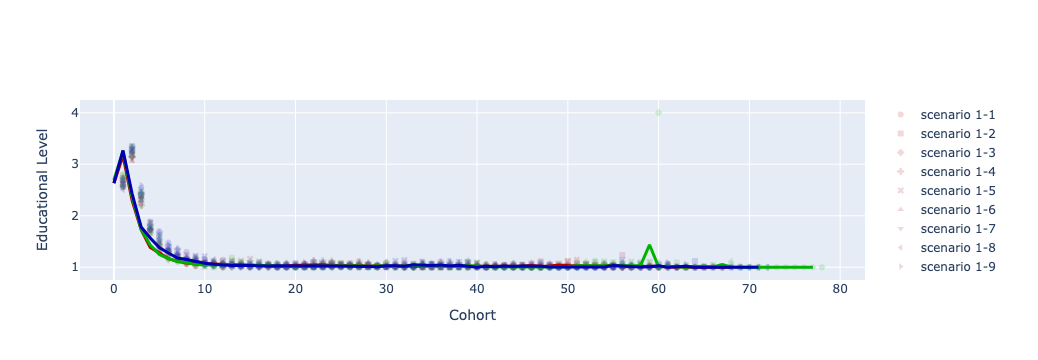

In [19]:
import plotly.graph_objects as go

# Create dictionary of dataframes
df_dict = {}
row=0
for j in range(1, num_scen+1):
    for i in range(1, num_reps+1):
        key = f"scenario {j}"
        df = dfs[row]
        df_mean = df.groupby(['Cohort'], as_index=False).Edu_level.mean()
        if key in df_dict:
            df_dict[key].append(df_mean)
        else:
            df_dict[key] = [df_mean]
        row += 1

# Create list of replications and scenarios
replications = [f"rep {i}" for i in range(1, num_reps+1)]
scenarios = [f"scenario {j}" for j in range(1, num_scen+1)]

# Create figure
fig = go.Figure()

# Loop through each scenario
for i, scenario in enumerate(scenarios):
    # Get dataframes for current scenario
    dfs_scenario = df_dict[scenario]
    # Get color for current scenario
    color = f"hsl({(i/len(scenarios))*360}, 50%, 50%)"
    # Loop through each replication of the current scenario
    for j, df in enumerate(dfs_scenario):
        # Get name for current replication
        name = f"{scenario}-{j+1}"
        fig.add_trace(go.Scatter(x=df["Cohort"], y=df["Edu_level"],
                                  name=name,
                                  mode="markers",
                                  marker=dict(symbol=j, color=color, opacity=0.2)))


# To make the lines appear on top of the scatter, make a new loop
for i, scenario in enumerate(scenarios):
    dfs_scenario = df_dict[scenario]
    color2 = f"hsl({(i/len(scenarios))*360}, 100%, 35%)"
    # Calculate the average line for the current scenario
    max_length = max(len(df) for df in dfs_scenario)
    avg_line = pd.concat([df.loc[:max_length-1, "Edu_level"] for df in dfs_scenario], axis=1).mean(axis=1)
    avg_line = avg_line.reset_index(name="Edu_level").rename(columns={"index": "Cohort"})
    
    # Add the average line as a trace
    fig.add_trace(go.Scatter(
        x=avg_line["Cohort"], y=avg_line["Edu_level"],
        name=f"{scenario} (Avg)",
        mode="lines",
        line=dict(color=color2, width=3),
    ))

fig.update_layout(
    xaxis_title="Cohort",
    yaxis_title="Educational Level",
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor = 'rgba(0,0,0,0)',
    # showlegend=False
)

# Show figure
fig.show()


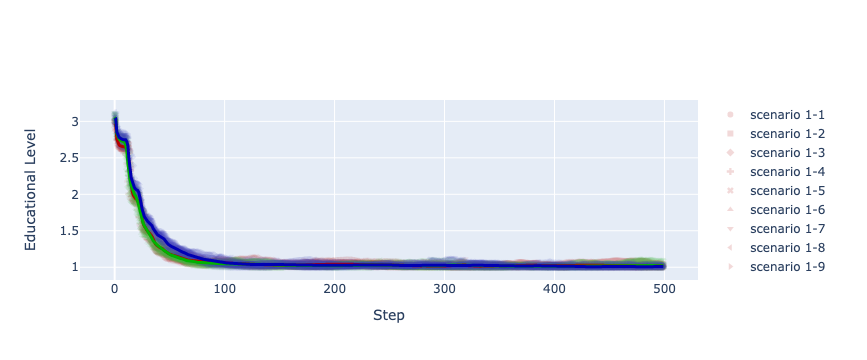

In [22]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Create dictionary of dataframes
df_dict = {}
row = 0
for j in range(1, num_scen+1):
    for i in range(1, num_reps+1):
        key = f"scenario {j}"
        rdf = rdfs[row]
        df_mean = rdf.groupby(['Step'], as_index=False).Education.mean()
        if key in df_dict:
            df_dict[key].append(df_mean)
        else:
            df_dict[key] = [df_mean]
        row += 1

# Create list of replications and scenarios
replications = [f"rep {i}" for i in range(1, num_reps+1)]
scenarios = [f"scenario {j}" for j in range(1, num_scen+1)]

# Create figure
fig = go.Figure()

# Loop through each scenario
for i, scenario in enumerate(scenarios):
    # Get dataframes for current scenario
    dfs_scenario = df_dict[scenario]
    # Get color for current scenario
    color = f"hsl({(i/len(scenarios))*360}, 50%, 50%)"
    
    # Loop through each replication of the current scenario
    for j, rdf in enumerate(dfs_scenario):
        # Get name for current replication
        name = f"{scenario}-{j+1}"
        
        # Add scatter dots for each replication
        fig.add_trace(go.Scatter(
            x=rdf["Step"], y=rdf["Education"],
            name=name,
            mode="markers",
            marker=dict(symbol=j, color=color, opacity=0.1)
        ))


# To make the lines appear on top of the scatter, make a new loop
for i, scenario in enumerate(scenarios):
    dfs_scenario = df_dict[scenario]
    color2 = f"hsl({(i/len(scenarios))*360}, 100%, 35%)"
    # Calculate the average line for the current scenario
    max_length = max(len(df) for df in dfs_scenario)
    avg_line = pd.concat([df.loc[:max_length-1, "Education"] for df in dfs_scenario], axis=1).mean(axis=1)
    avg_line = avg_line.reset_index(name="Education").rename(columns={"index": "Step"})
    
    # Add the average line as a trace
    fig.add_trace(go.Scatter(
        x=avg_line["Step"], y=avg_line["Education"],
        name=f"{scenario} (Avg)",
        mode="lines",
        line=dict(color=color2, width=3),
    ))

fig.update_layout(
    xaxis_title="Step",
    yaxis_title="Educational Level",
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor = 'rgba(0,0,0,0)',
    # showlegend=False
)

# Show figure
fig.show()


A clear distinction between Scenario 2 and 3

# Absolute Mobility

In [68]:
absolute = pd.DataFrame(columns=["Scenario", "Replication", "Cohort", "Probability"])
row = 0
for j in range(1, num_scen+1):
    for i in range(1, num_reps+1):
        df = dfs[row]
        am1 = df[(df['Mother_Edu'] < 5) & (df['Father_Edu'] <5)]
        am2 = df[(df['Mother_Edu'] == 5) | (df['Father_Edu'] ==5)]
        counts = am1[(am1['Edu_level'] > am1['Mother_Edu']) & (am1['Edu_level'] > am1['Father_Edu'])].groupby('Cohort').size()
        counts2 = am2[(am2['Edu_level'] == 5)].groupby('Cohort').size()
        totals = am1.groupby(['Cohort']).size()
        totals2 = am2.groupby('Cohort').size()
        probs = counts/totals
        probs = probs.fillna(0)
        probs2 = counts2 / totals2
        probs2 = probs.fillna(0)
        probs3 = probs2 + probs
        temp = pd.DataFrame({"Scenario": j, "Replication": i, "Cohort": probs.index, "Probability": probs.values})
        temp2 = pd.DataFrame({"Scenario": j, "Replication": i, "Cohort": probs3.index, "Probability": probs3.values})
        absolute = pd.concat([absolute, temp], ignore_index=True)
        absolute2 = pd.concat([absolute, temp2], ignore_index=True)
        row +=1

In [159]:
# absolute.drop('Replication')
abs1 = absolute.groupby(['Scenario', 'Cohort']).agg({'Probability': ["mean", "median", "var", "sem", "std"]}).reset_index()
abs1['ci95_hi'] = abs1['Probability']['mean'] + 1.96* abs1['Probability']['sem']
abs1['ci95_lo'] = abs1['Probability']['mean'] - 1.96* abs1['Probability']['sem']
# abs1.columns = abs1.columns.droplevel()
abs1.columns = ['_'.join(col) for col in abs1.columns]
abs1.rename(columns = {'Scenario_':'Scenario', 'Cohort_':'Cohort', 'ci95_hi_': 'ci95_hi', 'ci95_lo_':'ci95_lo'}, inplace = True)
abs1

,Scenario,Cohort,Probability_mean,Probability_median,Probability_var,Probability_sem,Probability_std,ci95_hi,ci95_lo
0,1,3,0.000800,0.000000,0.000006,0.000800,0.002530,0.002368,-0.000768
1,1,4,0.004122,0.000000,0.000054,0.002318,0.007330,0.008665,-0.000421
2,1,5,0.006231,0.003356,0.000055,0.002346,0.007419,0.010829,0.001633
3,1,6,0.008281,0.006714,0.000091,0.003010,0.009518,0.014180,0.002382
4,1,7,0.005781,0.003247,0.000049,0.002216,0.007009,0.010126,0.001437
...,...,...,...,...,...,...,...,...,...
208,3,68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
209,3,69,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
210,3,70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
211,3,71,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [160]:
# absolute.drop('Replication')
abs2 = absolute2.groupby(['Scenario', 'Cohort']).agg({'Probability': ["mean", "median", "var", "sem", "std"]}).reset_index()
abs2['ci95_hi'] = abs2['Probability']['mean'] + 1.96* abs2['Probability']['sem']
abs2['ci95_lo'] = abs2['Probability']['mean'] - 1.96* abs2['Probability']['sem']
abs2.columns = ['_'.join(col) for col in abs2.columns]
abs2.rename(columns = {'Scenario_':'Scenario', 'Cohort_':'Cohort', 'ci95_hi_': 'ci95_hi', 'ci95_lo_':'ci95_lo'}, inplace = True)
abs2

,Scenario,Cohort,Probability_mean,Probability_median,Probability_var,Probability_sem,Probability_std,ci95_hi,ci95_lo
0,1,3,0.000800,0.000000,0.000006,0.000800,0.002530,0.002368,-0.000768
1,1,4,0.004122,0.000000,0.000054,0.002318,0.007330,0.008665,-0.000421
2,1,5,0.006231,0.003356,0.000055,0.002346,0.007419,0.010829,0.001633
3,1,6,0.008281,0.006714,0.000091,0.003010,0.009518,0.014180,0.002382
4,1,7,0.005781,0.003247,0.000049,0.002216,0.007009,0.010126,0.001437
...,...,...,...,...,...,...,...,...,...
208,3,68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
209,3,69,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
210,3,70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
211,3,71,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [161]:
'''
    To csv file for further analysis
'''

absolute.to_csv(csv_path/"absolute_measure1_uf05.csv")
absolute2.to_csv(csv_path/"absolute_measure2_uf05.csv")
abs1.to_csv(csv_path/"absolute_measure1_sum_uf05.csv")
abs2.to_csv(csv_path/"absolute_measure2_sum_uf05.csv")

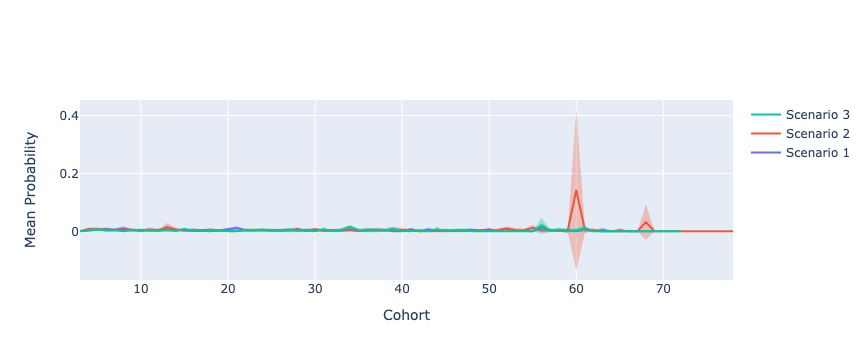

In [71]:
'''
    Continuous Graph
'''

import plotly.graph_objects as go

abs1["Scenario"] = abs1["Scenario"].astype(str)
scenarios = abs1["Scenario"].unique()

# Define a color map for the scenarios
color_map = {
    scenario: f"rgba({r}, {g}, {b}, 0.3)"
    for scenario, (r, g, b) in zip(scenarios, [(99, 109, 250), (239, 85, 59), (0, 204, 150)])
}




fig = go.Figure()

for scenario in scenarios:
    scenario_data = abs1[abs1["Scenario"] == scenario]
    
    fig.add_trace(go.Scatter(x=scenario_data['Cohort'],
                             y=scenario_data['Probability_mean'],
                             name=f'Scenario {scenario}',
                             mode='lines',
                             line=dict(color=color_map[scenario].replace('0.3', '1')))
                 )
    
    fig.add_trace(go.Scatter(x=scenario_data['Cohort'],
                             y=scenario_data['ci95_hi'],
                             name='Upper Bound of {}'.format(scenario),
                             mode='lines',
                             marker=dict(color="#444"),
                             line=dict(width=0),
                             showlegend=False))
    
    fig.add_trace(go.Scatter(x=scenario_data['Cohort'],
                             y=scenario_data['ci95_lo'],
                             name='Lower Bound of {}'.format(scenario),
                             mode='lines',
                             marker=dict(color="#444"),
                             line=dict(width=0),
                             showlegend=False,
                             fillcolor=color_map[scenario],
                             fill='tonexty'))
fig.update_layout(
    xaxis_title="Cohort",
    yaxis_title="Mean Probability",
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor = 'rgba(0,0,0,0)',
    # showlegend=False
)

fig.show()

# Who Benefits

In [73]:
'''
    Make a function to create summary tables for each data set
'''
def summary_tab(df):
    ls = pd.DataFrame()
    row = 0
    for i in df.Cohort.unique():
        cht = df[df['Cohort'] == i]
        for j in range(1, 6):
            for k in range(1, 6):
                new = cht[(cht['Mother_Edu'] == j) | (cht['Father_Edu'] == k)]
                n = new.size
                avg = new['Edu_level'].mean()
                med = new['Edu_level'].median()
                ls.loc[row, 'Cohort'] = i
                ls.loc[row, 'Average Edu'] = avg
                ls.loc[row, 'Median Edu'] = med
                ls.loc[row, 'Total'] = n
                ls.loc[row, 'Mother Edu'] = j
                ls.loc[row, 'Father Edu'] = k
                row += 1
    return ls

In [8]:
ls_full = pd.DataFrame()
row = 0
for i in range(1, num_scen+1):
    for j in range(1,num_reps+1):
        df = dfs[row]
        df2 =  df[df['Generation'] != 1]
        df3 = summary_tab(df2)
        df3['Scenario'] = i
        df3['Replication'] = j
        ls_full = pd.concat([ls_full, df3], ignore_index=True)
        row +=1

In [75]:
ls_full

,Cohort,Average Edu,Median Edu,Total,Mother Edu,Father Edu,Scenario,Replication
0,5.0,1.175676,1.0,2738.0,1.0,1.0,1,1
1,5.0,1.184783,1.0,3404.0,1.0,2.0,1,1
2,5.0,1.202703,1.0,2738.0,1.0,3.0,1,1
3,5.0,1.202703,1.0,2738.0,1.0,4.0,1,1
4,5.0,1.112903,1.0,2294.0,1.0,5.0,1,1
...,...,...,...,...,...,...,...,...
44220,69.0,1.000000,1.0,148.0,5.0,1.0,3,10
44221,69.0,NaN,NaN,0.0,5.0,2.0,3,10
44222,69.0,NaN,NaN,0.0,5.0,3.0,3,10
44223,69.0,NaN,NaN,0.0,5.0,4.0,3,10


In [74]:
agg_ls = ls_full.groupby(['Scenario', 'Cohort', 'Mother Edu', 'Father Edu']).agg({'Average Edu': ["mean", "sem", "std"], 'Median Edu': ['mean', 'sem', 'std'] }).reset_index()
agg_ls['ci95_hi_avg'] = agg_ls['Average Edu']['mean'] + 1.96* agg_ls['Average Edu']['sem']
agg_ls['ci95_lo_avg'] = agg_ls['Average Edu']['mean'] - 1.96* agg_ls['Average Edu']['sem']
agg_ls['ci95_hi_med'] = agg_ls['Median Edu']['mean'] + 1.96* agg_ls['Median Edu']['sem']
agg_ls['ci95_lo_med'] = agg_ls['Median Edu']['mean'] - 1.96* agg_ls['Median Edu']['sem']
agg_ls.columns = ['_'.join(col) for col in agg_ls.columns]
agg_ls.rename(columns = {'Scenario_':'Scenario', 'Cohort_':'Cohort', 'Mother Edu_':'Mother Edu', 'Father Edu_':'Father Edu',
                         'ci95_hi_avg_': 'ci95_hi_avg', 'ci95_lo_avg_':'ci95_lo_avg',
                         'ci95_hi_med_': 'ci95_hi_med', 'ci95_lo_med_':'ci95_lo_med'}, inplace = True)

agg_ls['Parent Edu'] = agg_ls.apply(lambda x: [x['Mother Edu'], x['Father Edu']], axis=1)

agg_ls.tail(5)

,Scenario,Cohort,Mother Edu,Father Edu,Average Edu_mean,Average Edu_sem,Average Edu_std,Median Edu_mean,Median Edu_sem,Median Edu_std,ci95_hi_avg,ci95_lo_avg,ci95_hi_med,ci95_lo_med,Parent Edu
5320,3,72.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,"[5.0, 1.0]"
5321,3,72.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 2.0]"
5322,3,72.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 3.0]"
5323,3,72.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 4.0]"
5324,3,72.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 5.0]"


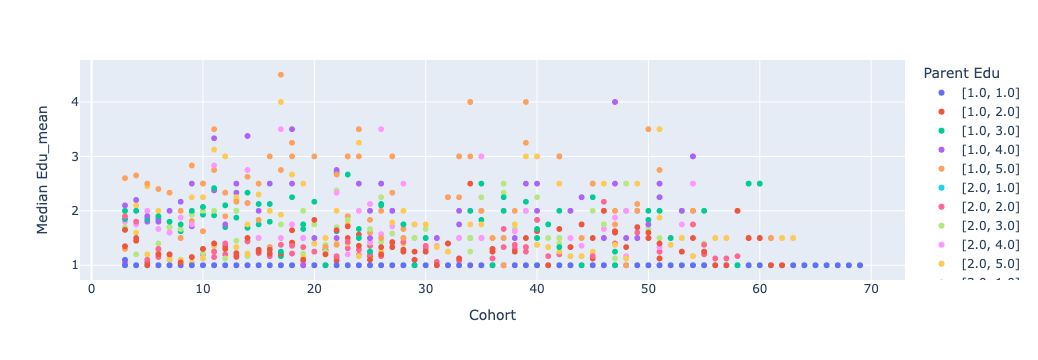

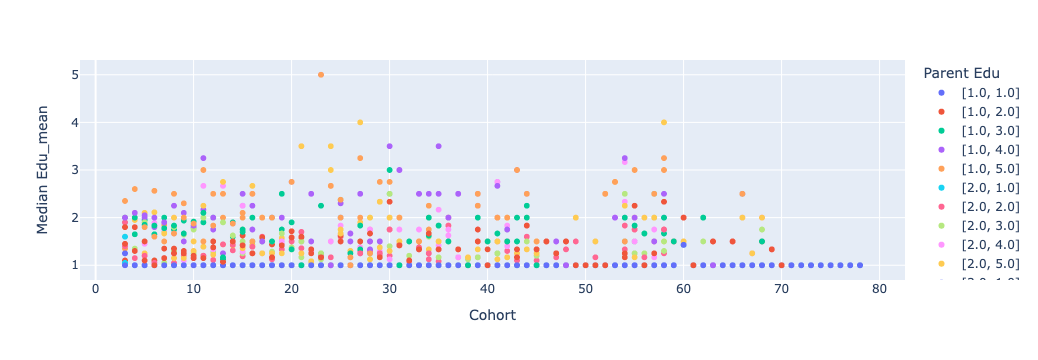

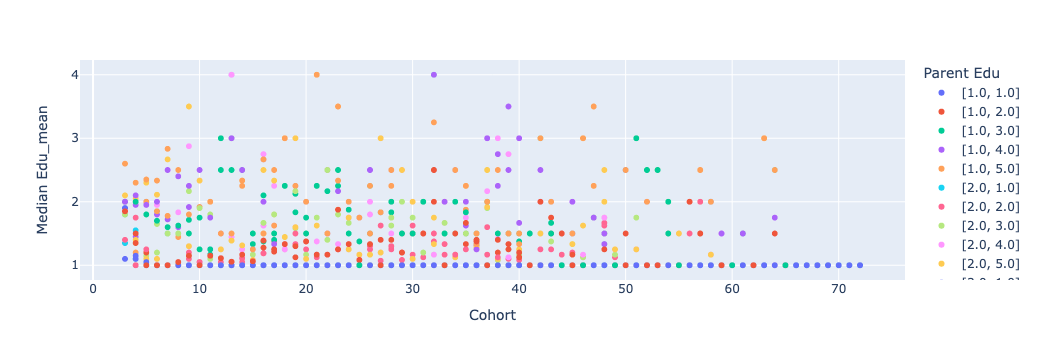

In [158]:
import plotly.express as px

agg_ls["Parent Edu"] = agg_ls["Parent Edu"].astype(str)
data = agg_ls[agg_ls['Scenario'] == 1]
fig1 = px.scatter(data, x='Cohort', y='Median Edu_mean', color='Parent Edu')

agg_ls["Parent Edu"] = agg_ls["Parent Edu"].astype(str)
data = agg_ls[agg_ls['Scenario'] == 2]
fig2 = px.scatter(data, x='Cohort', y='Median Edu_mean', color='Parent Edu')

agg_ls["Parent Edu"] = agg_ls["Parent Edu"].astype(str)
data = agg_ls[agg_ls['Scenario'] == 3]
fig3 = px.scatter(data, x='Cohort', y='Median Edu_mean', color='Parent Edu')

fig1.show()
fig2.show()
fig3.show()

In [148]:
agg_ls['Parent Edu 2'] = agg_ls['Parent Edu'].apply(lambda x: '[1, 2]' if x == '[1.0, 2.0]' or x == '[2.0, 1.0]'
                                                    else '[1, 3]' if x == '[1.0, 3.0]' or x == '[3.0, 1.0]'
                                                    else '[1, 4]' if x == '[1.0, 4.0]' or x == '[4.0, 1.0]' 
                                                    else '[1, 5]' if x == '[1.0, 5.0]' or x == '[5.0, 1.0]' 
                                                    else '[2, 3]' if x == '[2.0, 3.0]' or x == '[3.0, 2.0]' 
                                                    else '[2, 4]' if x == '[2.0, 4.0]' or x == '[4.0, 2.0]' 
                                                    else '[2, 5]' if x == '[2.0, 5.0]' or x == '[5.0, 2.0]'
                                                    else '[3, 4]' if x == '[3.0, 4.0]' or x == '[4.0, 3.0]'
                                                    else '[3, 5]' if x == '[3.0, 5.0]' or x == '[5.0, 3.0]' 
                                                    else '[4, 5]' if x == '[4.0, 5.0]' or x == '[5.0, 4.0]' 
                                                    else '[1, 1]' if x == '[1.0, 1.0]'
                                                    else '[2, 2]' if x == '[2.0, 2.0]'
                                                    else '[3, 3]' if x == '[3.0, 3.0]'
                                                    else '[4, 4]' if x == '[4.0, 4.0]'
                                                    else '[5, 5]' if x == '[5.0, 5.0]' 
                                                   else x)


In [149]:
agg_ls

,Scenario,Cohort,Mother Edu,Father Edu,Average Edu_mean,Average Edu_sem,Average Edu_std,Median Edu_mean,Median Edu_sem,Median Edu_std,ci95_hi_avg,ci95_lo_avg,ci95_hi_med,ci95_lo_med,Parent Edu,Parent Edu 2
0,1,3.0,1.0,1.0,1.115558,0.020864,0.065976,1.0,0.000000,0.000000,1.156450,1.074665,1.000000,1.000000,"[1.0, 1.0]","[1, 1]"
1,1,3.0,1.0,2.0,1.290018,0.034719,0.109791,1.0,0.000000,0.000000,1.358067,1.221969,1.000000,1.000000,"[1.0, 2.0]","[1, 2]"
2,1,3.0,1.0,3.0,1.550480,0.032050,0.101352,1.0,0.000000,0.000000,1.613299,1.487662,1.000000,1.000000,"[1.0, 3.0]","[1, 3]"
3,1,3.0,1.0,4.0,1.679882,0.029770,0.094142,1.1,0.100000,0.316228,1.738232,1.621533,1.296000,0.904000,"[1.0, 4.0]","[1, 4]"
4,1,3.0,1.0,5.0,2.053538,0.057414,0.181559,1.3,0.152753,0.483046,2.166069,1.941006,1.599395,1.000605,"[1.0, 5.0]","[1, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,3,72.0,5.0,1.0,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,"[5.0, 1.0]","[1, 5]"
5321,3,72.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 2.0]","[2, 5]"
5322,3,72.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 3.0]","[3, 5]"
5323,3,72.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[5.0, 4.0]","[4, 5]"


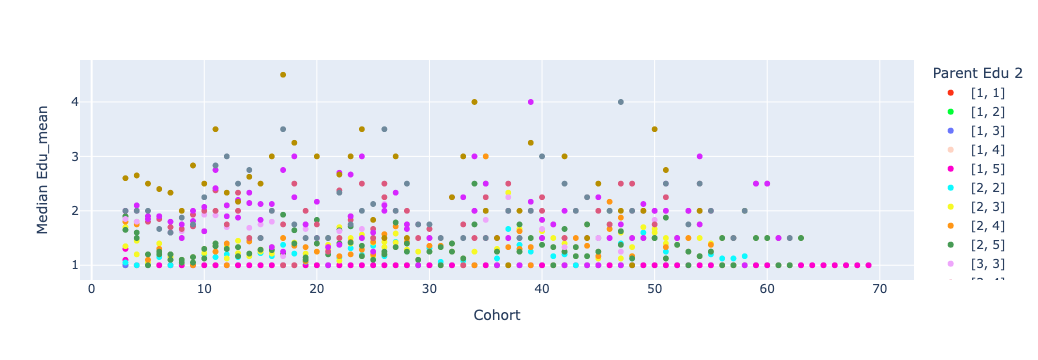

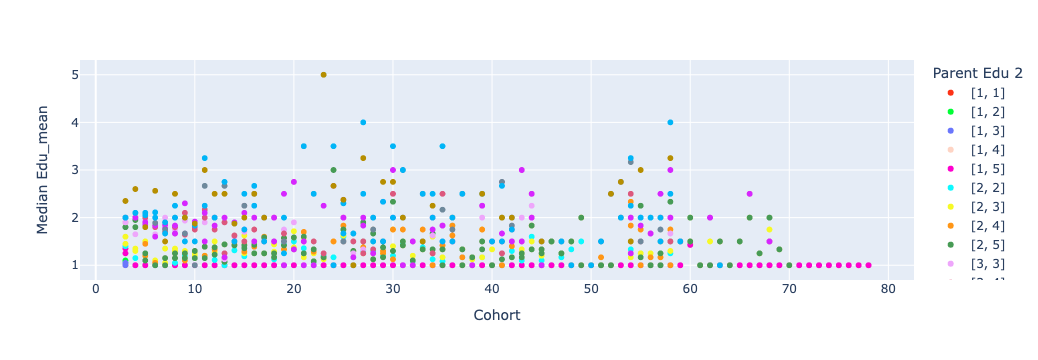

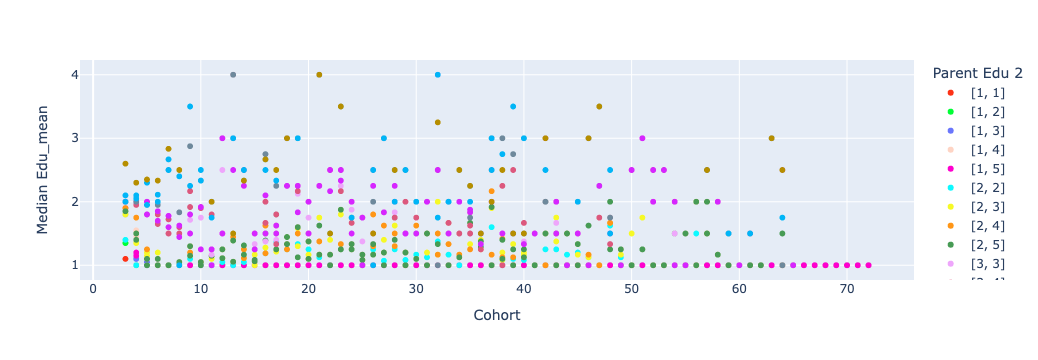

In [165]:
import plotly.express as px

agg_ls["Parent Edu 2"] = agg_ls["Parent Edu 2"].astype(str)
data = agg_ls[agg_ls['Scenario'] == 1]
fig1 = px.scatter(data, x='Cohort', y='Median Edu_mean', color='Parent Edu 2',
                 color_discrete_sequence=px.colors.qualitative.Light24)

agg_ls["Parent Edu 2"] = agg_ls["Parent Edu 2"].astype(str)
data = agg_ls[agg_ls['Scenario'] == 2]
fig2 = px.scatter(data, x='Cohort', y='Median Edu_mean', color='Parent Edu 2',
                 color_discrete_sequence=px.colors.qualitative.Light24)

agg_ls["Parent Edu 2"] = agg_ls["Parent Edu 2"].astype(str)
data = agg_ls[agg_ls['Scenario'] == 3]
fig3 = px.scatter(data, x='Cohort', y='Median Edu_mean', color='Parent Edu 2',
                 color_discrete_sequence=px.colors.qualitative.Light24)

fig1.show()
fig2.show()
fig3.show()

Less dispersed in Scenario 2, whereas Scenario 3 has the largest dispersion among the three. 